In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
rdb = pd.read_csv('../Robbins/Supplemental Material - Pluto.csv')
print rdb.columns

Index([u'MASTER_ID', u'MASTER_LAT', u'MASTER_LON', u'MASTER_DIAM',
       u'MASTER_CONF', u'MASTER_NUMBER', u'MASTER_LAT_SD', u'MASTER_LON_SD',
       u'MASTER_DIAM_SD', u'MASTER_CONF_SD'],
      dtype='object')


In [25]:
import cv2
tif = cv2.imread('../Pluto_NewHorizons_Global_Mosaic_300m_Jul2017_8bit.tif')
tifsl =tif[4400:6000,8900:10300]

In [3]:
scale = 69.132491671495  #pixels/deg
colpix = 360*scale
rowpix = colpix/2
print colpix, rowpix 
rdb['col'] = rdb['MASTER_LON']/360.*colpix
rdb['row'] = (rdb['MASTER_LAT']/90.*rowpix/2.-rowpix/2)*-1

24887.6970017 12443.8485009


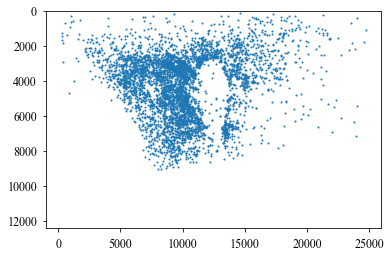

In [4]:
plt.figure()
plt.scatter(rdb['col'],rdb['row'],s=1)
plt.ylim(rowpix,0)
plt.show()

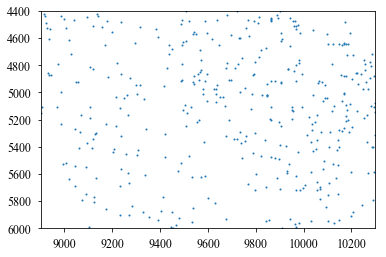

In [5]:
plt.figure()
plt.scatter(rdb['col'],rdb['row'],s=1)
plt.ylim(6000,4400)
plt.xlim(8900,10300)
plt.show()

In [6]:
test = np.load('../slices/4400_6000_8900_10300.npy')

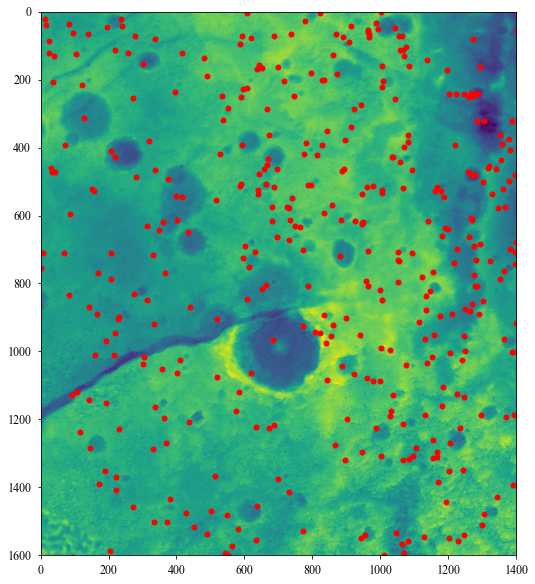

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(test)
plt.plot(rdb['col']-8900,rdb['row']-4400,'ro',ms=5)
plt.xlim(0,1400)
plt.ylim(1600,0)
plt.show()

In [73]:
big= rdb[rdb['MASTER_DIAM']>5]
big_range = big[(big['col']>8900)&(big['col']<10300)]
big_range = big[(big['row']>4400)&(big['row']<6000)]
big_conf = big_range[big_range['MASTER_CONF']>=4.0]

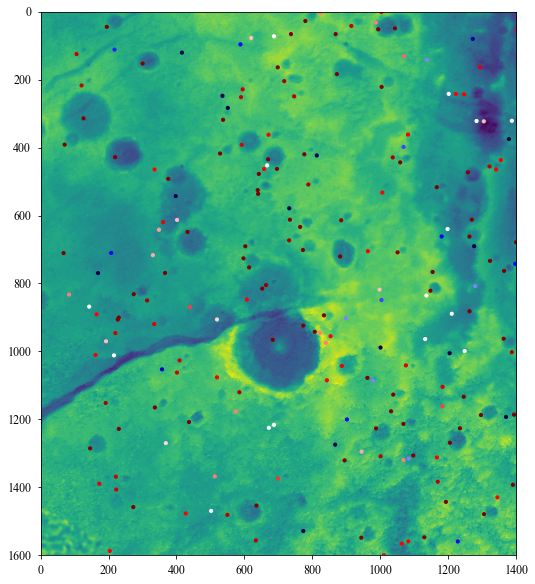

In [74]:
plt.figure(figsize=(10,10))
plt.imshow(test)
plt.scatter(big_range['col']-8900,big_range['row']-4400,c=big_range['MASTER_CONF'],s=10,cmap='seismic')
plt.xlim(0,1400)
plt.ylim(1600,0)
plt.show()

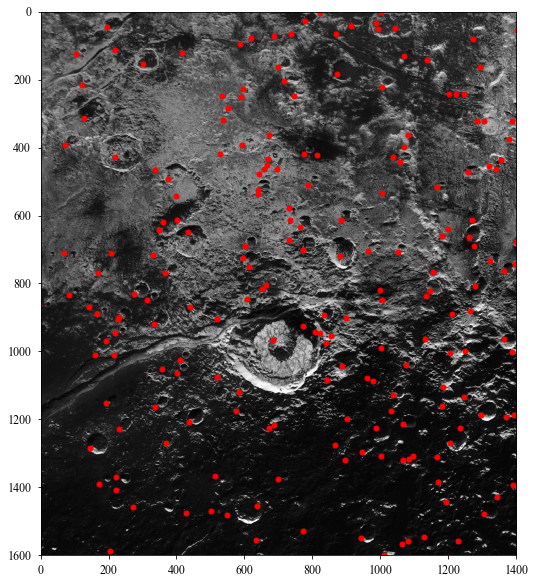

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(tifsl)
plt.plot(big_range['col']-8900,big_range['row']-4400,'ro',ms=5)
plt.xlim(0,1400)
plt.ylim(1600,0)
plt.show()

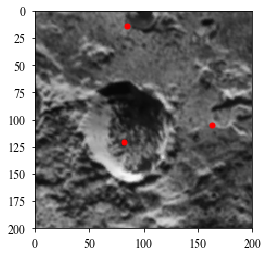

In [76]:
tifsm = tifsl[600:800,800:1000]
plt.figure()
plt.imshow(tifsm)
plt.plot(big_range['col']-9700,big_range['row']-5000,'ro',ms=5)
plt.xlim(0,200)
plt.ylim(200,0)
plt.show()

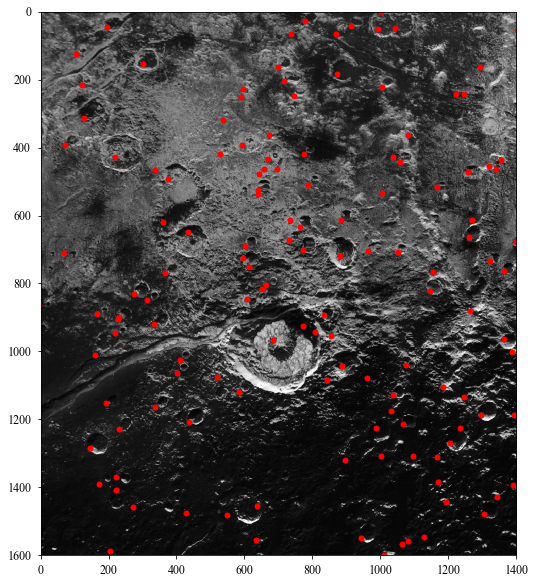

In [77]:
plt.figure(figsize=(10,10))
plt.imshow(tifsl)
plt.plot(big_conf['col']-8900,big_conf['row']-4400,'ro',ms=5)
plt.xlim(0,1400)
plt.ylim(1600,0)
plt.show()

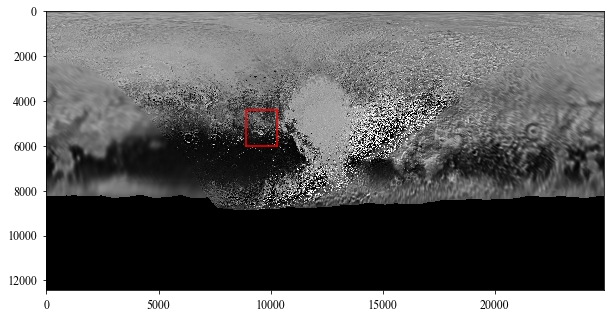

In [79]:
plt.figure(figsize=(10,10))
plt.imshow(tif)
plt.plot([8900,10300],[4400,4400],'r-')
plt.plot([8900,10300],[6000,6000],'r-')
plt.plot([8900,8900],[4400,6000],'r-')
plt.plot([10300,10300],[4400,6000],'r-')
plt.show()

In [80]:
dem_sm = cv2.imread('../Pluto_NewHorizons_Global_DEM_300m_Jul2017_1024.jpg')

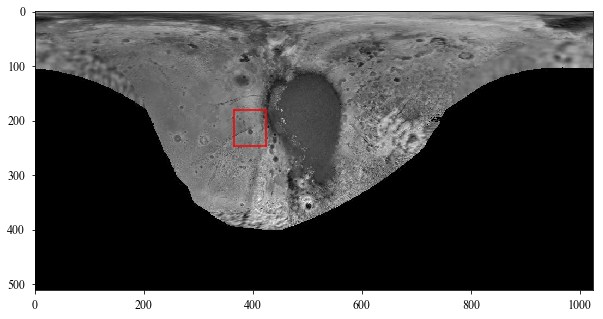

In [92]:
plt.figure(figsize=(10,10))
plt.imshow(dem_sm)
plt.plot([8900./24888*(1024),10300./24888*(1024)],[4400./12444*1024/2,4400./12444*1024/2],'r-')
plt.plot([8900./24888*(1024),10300./24888*(1024.)],[6000./12444*1024/2,6000./12444*1024/2],'r-')
plt.plot([8900./24888*(1024),8900./24888*(1024)],[4400./12444*1024/2,6000./12444*1024/2],'r-')
plt.plot([10300./24888*(1024),10300./24888*(1024)],[4400./12444*1024/2,6000./12444*1024/2],'r-')
plt.show()

In [91]:
8900/24888*(1024)

0